In [1]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [2]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [8]:
dates = pd.date_range('20130101', periods=6)

In [9]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [11]:
pdf

,A,B,C,D
2013-01-01,-0.515338,1.327498,1.428202,0.420421
2013-01-02,-1.203385,1.867957,-2.264390,-1.398813
2013-01-03,-0.592710,1.259715,0.107424,0.106021
2013-01-04,-0.268757,-0.780811,-0.140313,-0.333343
2013-01-05,-0.472414,0.129152,-0.087447,0.132657
2013-01-06,-0.077977,-1.428543,-0.015248,-0.849677


In [12]:
kdf = ks.from_pandas(pdf)

In [13]:
type(kdf)

databricks.koalas.frame.DataFrame

In [14]:
kdf

,A,B,C,D
2013-01-01,-0.515338,1.327498,1.428202,0.420421
2013-01-02,-1.203385,1.867957,-2.264390,-1.398813
2013-01-03,-0.592710,1.259715,0.107424,0.106021
2013-01-04,-0.268757,-0.780811,-0.140313,-0.333343
2013-01-05,-0.472414,0.129152,-0.087447,0.132657
2013-01-06,-0.077977,-1.428543,-0.015248,-0.849677


In [15]:
spark = SparkSession.builder.getOrCreate()

In [16]:
sdf = spark.createDataFrame(pdf)

In [17]:
sdf.show()

+--------------------+-------------------+--------------------+-------------------+
|                   A|                  B|                   C|                  D|
+--------------------+-------------------+--------------------+-------------------+
| -0.5153380043288408| 1.3274978150936538|  1.4282022893810062|0.42042121785524905|
| -1.2033846020436982|  1.867957420345691|  -2.264389552904981|-1.3988125702039815|
| -0.5927101358397119| 1.2597150244510142| 0.10742425050325032| 0.1060212251193737|
|-0.26875739988573655| -0.780811232809215|-0.14031340674859302|-0.3333431685236846|
|-0.47241448857519147|0.12915151153770807|-0.08744681622823688| 0.1326570228545794|
|-0.07797654174700233|-1.4285431273153533|-0.01524802266656...|-0.8496771727501412|
+--------------------+-------------------+--------------------+-------------------+



In [18]:
kdf = sdf.to_koalas()

In [19]:
kdf

,A,B,C,D
0,-0.515338,1.327498,1.428202,0.420421
1,-1.203385,1.867957,-2.264390,-1.398813
2,-0.592710,1.259715,0.107424,0.106021
3,-0.268757,-0.780811,-0.140313,-0.333343
4,-0.472414,0.129152,-0.087447,0.132657
5,-0.077977,-1.428543,-0.015248,-0.849677


In [20]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [21]:
kdf.head()

,A,B,C,D
0,-0.515338,1.327498,1.428202,0.420421
1,-1.203385,1.867957,-2.264390,-1.398813
2,-0.592710,1.259715,0.107424,0.106021
3,-0.268757,-0.780811,-0.140313,-0.333343
4,-0.472414,0.129152,-0.087447,0.132657


In [22]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [23]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
kdf.to_numpy()

array([[-0.515338  ,  1.32749782,  1.42820229,  0.42042122],
       [-1.2033846 ,  1.86795742, -2.26438955, -1.39881257],
       [-0.59271014,  1.25971502,  0.10742425,  0.10602123],
       [-0.2687574 , -0.78081123, -0.14031341, -0.33334317],
       [-0.47241449,  0.12915151, -0.08744682,  0.13265702],
       [-0.07797654, -1.42854313, -0.01524802, -0.84967717]])

In [25]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.521764,0.395828,-0.161962,-0.320456
std,0.382904,1.308847,1.187345,0.689810
min,-1.203385,-1.428543,-2.264390,-1.398813
25%,-0.592710,-0.780811,-0.140313,-0.849677
50%,-0.515338,0.129152,-0.087447,-0.333343
75%,-0.268757,1.327498,0.107424,0.132657
max,-0.077977,1.867957,1.428202,0.420421


In [26]:
kdf.T

,0,1,2,3,4,5
A,-0.515338,-1.203385,-0.592710,-0.268757,-0.472414,-0.077977
B,1.327498,1.867957,1.259715,-0.780811,0.129152,-1.428543
C,1.428202,-2.264390,0.107424,-0.140313,-0.087447,-0.015248
D,0.420421,-1.398813,0.106021,-0.333343,0.132657,-0.849677


In [27]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,-0.077977,-1.428543,-0.015248,-0.849677
4,-0.472414,0.129152,-0.087447,0.132657
3,-0.268757,-0.780811,-0.140313,-0.333343
2,-0.592710,1.259715,0.107424,0.106021
1,-1.203385,1.867957,-2.264390,-1.398813
0,-0.515338,1.327498,1.428202,0.420421


In [28]:
kdf.sort_values(by='B')

,A,B,C,D
5,-0.077977,-1.428543,-0.015248,-0.849677
3,-0.268757,-0.780811,-0.140313,-0.333343
4,-0.472414,0.129152,-0.087447,0.132657
2,-0.592710,1.259715,0.107424,0.106021
0,-0.515338,1.327498,1.428202,0.420421
1,-1.203385,1.867957,-2.264390,-1.398813


In [29]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [30]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [31]:
kdf1 = ks.from_pandas(pdf1)

In [32]:
kdf1

,A,B,C,D,E
2013-01-01,-0.515338,1.327498,1.428202,0.420421,1.0
2013-01-02,-1.203385,1.867957,-2.264390,-1.398813,1.0
2013-01-03,-0.592710,1.259715,0.107424,0.106021,NaN
2013-01-04,-0.268757,-0.780811,-0.140313,-0.333343,NaN


In [33]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.515338,1.327498,1.428202,0.420421,1.0
2013-01-02,-1.203385,1.867957,-2.264390,-1.398813,1.0


In [34]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.515338,1.327498,1.428202,0.420421,1.0
2013-01-02,-1.203385,1.867957,-2.264390,-1.398813,1.0
2013-01-03,-0.592710,1.259715,0.107424,0.106021,5.0
2013-01-04,-0.268757,-0.780811,-0.140313,-0.333343,5.0


In [35]:
kdf.mean()

A   -0.521764
B    0.395828
C   -0.161962
D   -0.320456
dtype: float64

In [36]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [37]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

167 ms ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1.29 s ± 375 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

In [40]:
%timeit ks.range(300000).to_pandas()

1.67 s ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [42]:
kdf

,A,B,C,D
0,foo,one,-0.146517,0.685786
1,bar,one,0.018522,0.040454
2,foo,two,-0.959051,-0.033874
3,bar,three,-1.814895,-0.152457
4,foo,two,-0.672663,-0.965711
5,bar,two,-0.631560,2.276697
6,foo,one,0.614235,3.007917
7,foo,three,-2.003997,1.727542


In [43]:
kdf.groupby('A').sum()

,C,D
A,,
bar,-2.427933,2.164694
foo,-3.167993,4.421660


In [44]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    0.467718  3.693703
    two   -1.631714 -0.999585
bar three -1.814895 -0.152457
foo three -2.003997  1.727542
bar two   -0.631560  2.276697
    one    0.018522  0.040454

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt

In [46]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [47]:
kser = ks.Series(pser)

In [48]:
kser = kser.cummax()

<AxesSubplot:>

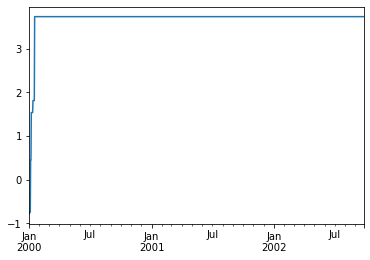

In [49]:
kser.plot()

In [50]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [51]:
kdf = ks.from_pandas(pdf)

In [52]:
kdf = kdf.cummax()

<AxesSubplot:>

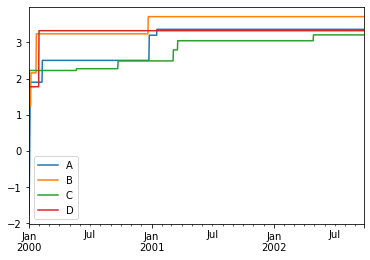

In [53]:
kdf.plot()